In [363]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
df_income = pd.read_excel('https://query.data.world/s/vezgbkkuilwqjcidh2gs5qowhoabbp')
df_output = pd.read_csv('https://query.data.world/s/ytao4qfxjp2l52kji335royipfrhgk')

I am going to use these two data sets to explore if a state has a higher gdp, if it will have more households with higher income levels. 

This first data set shows the GDP of each county for each state.

In [364]:
df_output

,Year,County FIPS,Region,SUB_REGION,State,STATE_ABBR,County,County Full Name,GDP (Chained $)
0,2001,1001,Southeast,East South Central,Alabama,AL,Autauga,Autauga County,954588000
1,2001,1003,Southeast,East South Central,Alabama,AL,Baldwin,Baldwin County,3929753000
2,2001,1005,Southeast,East South Central,Alabama,AL,Barbour,Barbour County,813278000
3,2001,1007,Southeast,East South Central,Alabama,AL,Bibb,Bibb County,292693000
4,2001,1009,Southeast,East South Central,Alabama,AL,Blount,Blount County,810381000
...,...,...,...,...,...,...,...,...,...
55558,2018,56037,Rocky Mountain,Mountain,Wyoming,WY,Sweetwater,Sweetwater County,3836603000
55559,2018,56039,Rocky Mountain,Mountain,Wyoming,WY,Teton,Teton County,2166420000
55560,2018,56041,Rocky Mountain,Mountain,Wyoming,WY,Uinta,Uinta County,906587000
55561,2018,56043,Rocky Mountain,Mountain,Wyoming,WY,Washakie,Washakie County,358104000


This next data set shows the income ranges for each state.

In [365]:
df_income

,Year,State,Income Level,Percent of Total,Number of Households
0,2009,Alabama,"$10,000 to $14,999",0.0742,134988
1,2009,Alabama,"$15,000 to $19,999",0.0687,125046
2,2009,Alabama,"$20,000 to $24,999",0.0661,120178
3,2009,Alabama,"$25,000 to $29,999",0.0607,110437
4,2009,Alabama,"$30,000 to $34,999",0.0578,105216
...,...,...,...,...,...
6651,2016,Wyoming,"$100,000 to $124,999",0.1022,23197
6652,2016,Wyoming,"$125,000 to $149,999",0.0584,13254
6653,2016,Wyoming,"$150,000 to $199,999",0.0499,11330
6654,2016,Wyoming,"$200,000 or more",0.0345,7831


In [366]:
df_output['Year'].max()

2018

In [367]:
df_income['Year'].max()

2016

In [368]:
df_output.groupby(['Year']).count()

,County FIPS,Region,SUB_REGION,State,STATE_ABBR,County,County Full Name,GDP (Chained $)
Year,,,,,,,,
2001,3083,3083,3083,3083,3083,3083,3083,3083
2002,3084,3084,3084,3084,3084,3084,3084,3084
2003,3084,3084,3084,3084,3084,3084,3084,3084
2004,3084,3084,3084,3084,3084,3084,3084,3084
2005,3084,3084,3084,3084,3084,3084,3084,3084
2006,3084,3084,3084,3084,3084,3084,3084,3084
2007,3084,3084,3084,3084,3084,3084,3084,3084
2008,3086,3086,3086,3086,3086,3086,3086,3086
2009,3089,3089,3089,3089,3089,3089,3089,3089


In [369]:
df_income.groupby(['Year']).count()

,State,Income Level,Percent of Total,Number of Households
Year,,,,
2009,832,832,832,832
2010,832,832,832,832
2011,832,832,832,832
2012,832,832,832,832
2013,832,832,832,832
2014,832,832,832,832
2015,832,832,832,832
2016,832,832,832,832


The most current year that the two datasets have in common are 2016. 2016 is the year we will look at in both data sets. 


In [370]:
df_income['Income Level'].describe()

count                 6656
unique                  16
top       $200,000 or more
freq                   416
Name: Income Level, dtype: object

In [371]:
states_200000 = []
households_200000 = []

for i in range(len(df_income)):
    if df_income.loc[i, 'Income Level'] == '$200,000 or more' and df_income.loc[i, 'Year'] == 2016:
        states_200000.append(df_income.loc[i, 'State']) 
        households_200000.append(df_income.loc[i, 'Number of Households'])
print(states_200000)
print(households_200000)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
[54083, 16978, 101665, 30167, 1110197, 128838, 138828, 18630, 39318, 322098, 167730, 33209, 17296, 298593, 76393, 43056, 44514, 49355, 63592, 18197, 211938, 246174, 146636, 122773, 25197, 83135, 13541, 27310, 38588, 34375, 343659, 23902, 584890, 149227, 14859, 168570, 48490, 66308, 243593, 8869, 22521, 58221, 11569, 88253, 531221, 42247

Above I am cleaning my data to find how many households make over 200,000 in the year 2016.

I will make a new data frame with that information. 

In [372]:
index = ['State','Households']
states_highest_income_households = pd.DataFrame({"State": states_200000,
                                                 "Households": households_200000 })


In [373]:
states_highest_income_households

,State,Households
0,Alabama,54083
1,Alaska,16978
2,Arizona,101665
3,Arkansas,30167
4,California,1110197
5,Colorado,128838
6,Connecticut,138828
7,Delaware,18630
8,District of Columbia,39318
9,Florida,322098


Above is the new data frame with the information that we collected.

Below we will make a bar graph to visualize the above data. 

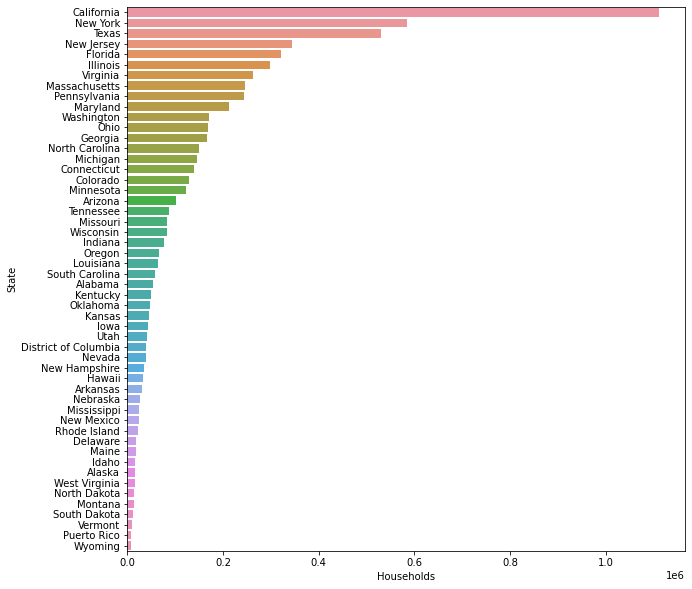

In [374]:
plt.figure(figsize = (10, 10))
sns.barplot(x = 'Households', y = 'State', data = states_highest_income_households, orient = 'h', order = states_highest_income_households.sort_values('Households', ascending = False).State )
plt.show()


In [375]:
df_output


,Year,County FIPS,Region,SUB_REGION,State,STATE_ABBR,County,County Full Name,GDP (Chained $)
0,2001,1001,Southeast,East South Central,Alabama,AL,Autauga,Autauga County,954588000
1,2001,1003,Southeast,East South Central,Alabama,AL,Baldwin,Baldwin County,3929753000
2,2001,1005,Southeast,East South Central,Alabama,AL,Barbour,Barbour County,813278000
3,2001,1007,Southeast,East South Central,Alabama,AL,Bibb,Bibb County,292693000
4,2001,1009,Southeast,East South Central,Alabama,AL,Blount,Blount County,810381000
...,...,...,...,...,...,...,...,...,...
55558,2018,56037,Rocky Mountain,Mountain,Wyoming,WY,Sweetwater,Sweetwater County,3836603000
55559,2018,56039,Rocky Mountain,Mountain,Wyoming,WY,Teton,Teton County,2166420000
55560,2018,56041,Rocky Mountain,Mountain,Wyoming,WY,Uinta,Uinta County,906587000
55561,2018,56043,Rocky Mountain,Mountain,Wyoming,WY,Washakie,Washakie County,358104000


I do not need a lot of the columns in this data frame. I am going to make a new data frame from this with only the columns that I need. 

In [376]:
cleaned_ouput = df_output[['Year', 'State', 'GDP (Chained $)']]

In [377]:
cleaned_ouput

,Year,State,GDP (Chained $)
0,2001,Alabama,954588000
1,2001,Alabama,3929753000
2,2001,Alabama,813278000
3,2001,Alabama,292693000
4,2001,Alabama,810381000
...,...,...,...
55558,2018,Wyoming,3836603000
55559,2018,Wyoming,2166420000
55560,2018,Wyoming,906587000
55561,2018,Wyoming,358104000


In this data set, everything was broken down by county instead of just the states. To get what we need from that data I will add the counties up from the year we need and combine them. 

I will use that information to make a new data frame that we can use. 

In [378]:
gdp_dict = {}

for i in range(len(cleaned_ouput)):
    if cleaned_ouput.loc[i, 'Year'] == 2016:
        if cleaned_ouput.loc[i, 'State'] not in gdp_dict:
            gdp_dict[cleaned_ouput.loc[i, 'State']] = cleaned_ouput.loc[i, 'GDP (Chained $)']
        else:
            update = gdp_dict[cleaned_ouput.loc[i, 'State']] + cleaned_ouput.loc[i, 'GDP (Chained $)']
            gdp_dict[cleaned_ouput.loc[i, 'State']] = update
print(gdp_dict)


{'Alabama': 190619674000, 'Alaska': 52608884000, 'Arizona': 289146226000, 'Arkansas': 114417121000, 'California': 2501333824000, 'Colorado': 316273245000, 'Connecticut': 242845819000, 'Delaware': 63131800000, 'District of Columbia': 119567337000, 'Florida': 866737878000, 'Georgia': 498316939000, 'Hawaii': 69915557000, 'Idaho': 65542900000, 'Maine': 54975217000, 'Maryland': 356841549000, 'Massachusetts': 478919611000, 'Michigan': 452247727000, 'Minnesota': 319048859000, 'Mississippi': 100647776000, 'Missouri': 275469956000, 'Montana': 44135377000, 'Illinois': 746955291000, 'Indiana': 316564671000, 'Iowa': 168896437000, 'Kansas': 149934360000, 'Kentucky': 182298661000, 'Louisiana': 228116723000, 'New Jersey': 540040580000, 'New Mexico': 91036924000, 'New York': 1389424794000, 'North Carolina': 475364307000, 'North Dakota': 50613213000, 'Ohio': 586385861000, 'Oklahoma': 190801993000, 'Oregon': 200993046000, 'Pennsylvania': 690509955000, 'Rhode Island': 53087173000, 'South Carolina': 19547

In [379]:
gdp_dict

{'Alabama': 190619674000,
 'Alaska': 52608884000,
 'Arizona': 289146226000,
 'Arkansas': 114417121000,
 'California': 2501333824000,
 'Colorado': 316273245000,
 'Connecticut': 242845819000,
 'Delaware': 63131800000,
 'District of Columbia': 119567337000,
 'Florida': 866737878000,
 'Georgia': 498316939000,
 'Hawaii': 69915557000,
 'Idaho': 65542900000,
 'Maine': 54975217000,
 'Maryland': 356841549000,
 'Massachusetts': 478919611000,
 'Michigan': 452247727000,
 'Minnesota': 319048859000,
 'Mississippi': 100647776000,
 'Missouri': 275469956000,
 'Montana': 44135377000,
 'Illinois': 746955291000,
 'Indiana': 316564671000,
 'Iowa': 168896437000,
 'Kansas': 149934360000,
 'Kentucky': 182298661000,
 'Louisiana': 228116723000,
 'New Jersey': 540040580000,
 'New Mexico': 91036924000,
 'New York': 1389424794000,
 'North Carolina': 475364307000,
 'North Dakota': 50613213000,
 'Ohio': 586385861000,
 'Oklahoma': 190801993000,
 'Oregon': 200993046000,
 'Pennsylvania': 690509955000,
 'Rhode Island': 

In [380]:
gdp_df = pd.DataFrame(gdp_dict, index =['gdp'])


In [381]:
gdp_df


,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Vermont,Virginia,Washington,West Virginia,Nebraska,Nevada,New Hampshire,Tennessee,Wisconsin,Wyoming
gdp,190619674000,52608884000,289146226000,114417121000,2501333824000,316273245000,242845819000,63131800000,119567337000,866737878000,...,29364907000,265991841000,459875471000,68897531000,110926677000,139162113000,72822046000,308061327000,290779164000,37985942000


<AxesSubplot:>

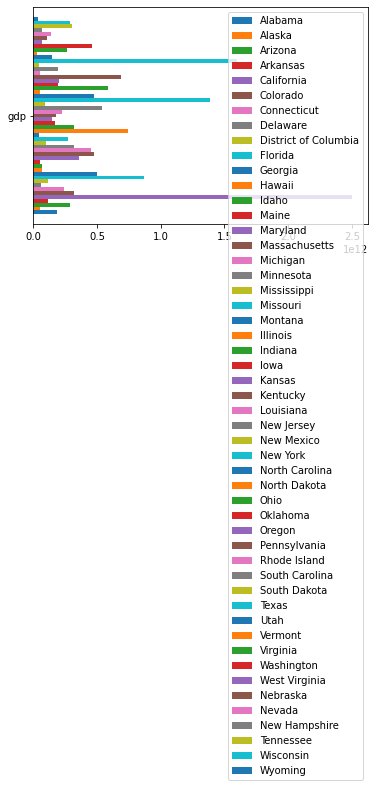

In [382]:
gdp_df.plot(kind = 'barh', label='Inline label', width=5)

In [383]:
gdp_keys = gdp_dict.keys()
gdp_values = gdp_dict.values()


    
print(gdp_keys)
print(gdp_values)

dict_keys(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Nebraska', 'Nevada', 'New Hampshire', 'Tennessee', 'Wisconsin', 'Wyoming'])
dict_values([190619674000, 52608884000, 289146226000, 114417121000, 2501333824000, 316273245000, 242845819000, 63131800000, 119567337000, 866737878000, 498316939000, 69915557000, 65542900000, 54975217000, 356841549000, 478919611000, 452247727000, 319048859000, 100647776000, 275469956000, 44135377000, 746955291000, 316564671000, 168896437000

In [384]:
states_gdp = pd.DataFrame({"State": gdp_keys, "GDP": gdp_values})



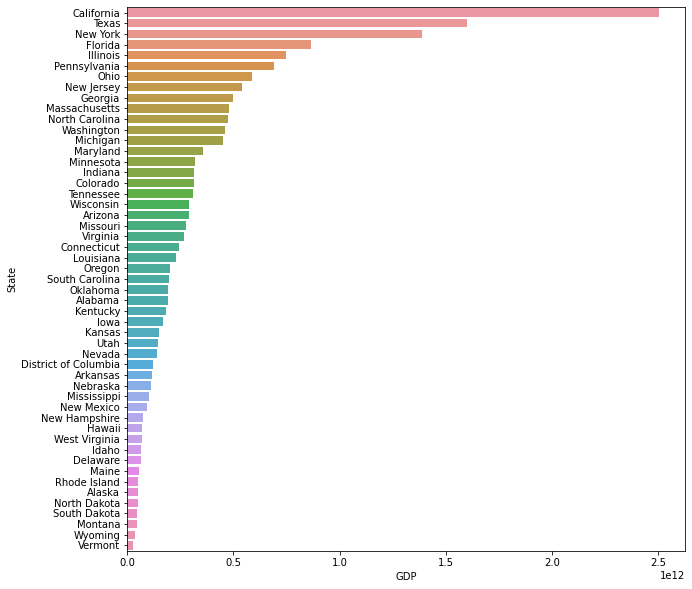

In [385]:
plt.figure(figsize = (10, 10))
sns.barplot(x = 'GDP', y = 'State', data = states_gdp, orient = 'h', order = states_gdp.sort_values('GDP', ascending = False).State )
plt.show()

(<AxesSubplot:>, <AxesSubplot:>)

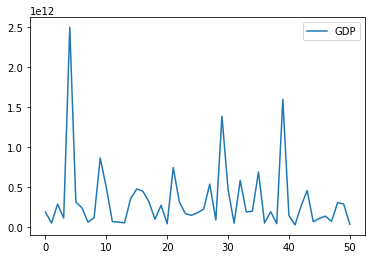

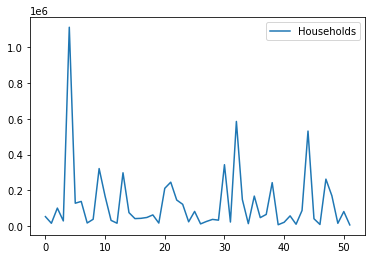

In [386]:
states_gdp.plot(), states_highest_income_households.plot()

In [387]:
states_median = []
households_median = []

for i in range(len(df_income)):
    if df_income.loc[i, 'Income Level'] == '$60,000 to $74,999' and df_income.loc[i, 'Year'] == 2016:
        states_median.append(df_income.loc[i, 'State']) 
        households_median.append(df_income.loc[i, 'Number of Households'])
print(states_median)
print(households_median)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
[174333, 26891, 247629, 109400, 1203377, 211250, 126135, 37108, 21155, 738333, 359941, 48316, 66619, 478067, 272071, 138837, 120467, 169183, 156880, 59455, 213460, 229018, 398018, 229691, 100164, 245202, 44026, 82811, 114366, 55630, 286887, 71473, 671207, 374954, 32554, 472799, 153583, 161757, 507393, 58223, 39318, 183676, 37161, 251931

In [388]:
states_median_income = pd.DataFrame({"State": states_median,
                                                 "Households": households_median})

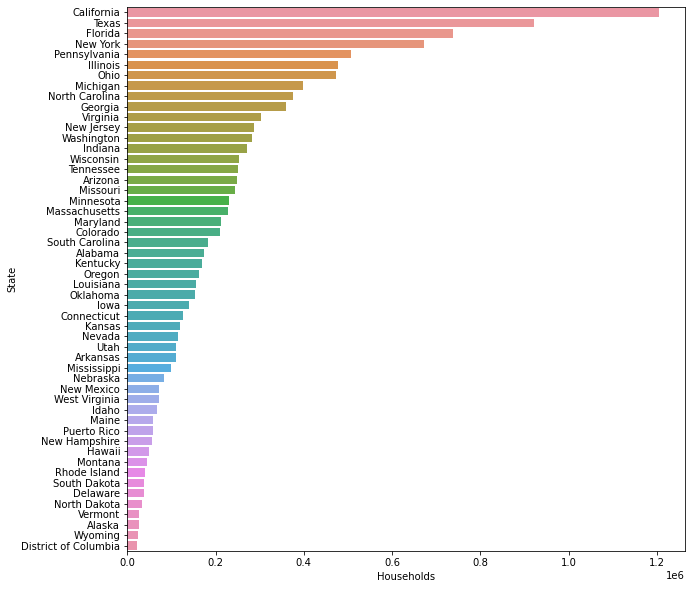

In [389]:
plt.figure(figsize = (10, 10))
sns.barplot(x = 'Households', y = 'State', data = states_median_income, orient = 'h', order = states_median_income.sort_values('Households', ascending = False).State )
plt.show()

In [390]:
states_median_income


,State,Households
0,Alabama,174333
1,Alaska,26891
2,Arizona,247629
3,Arkansas,109400
4,California,1203377
5,Colorado,211250
6,Connecticut,126135
7,Delaware,37108
8,District of Columbia,21155
9,Florida,738333


(<AxesSubplot:title={'center':'60,000 to 74,999'}>,
 <AxesSubplot:title={'center':'State GDP'}>,
 <AxesSubplot:title={'center':'200,000 or more'}>)

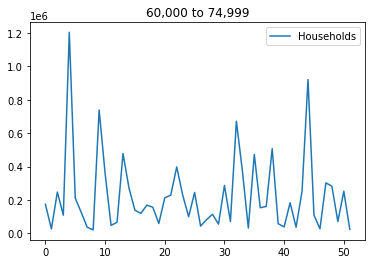

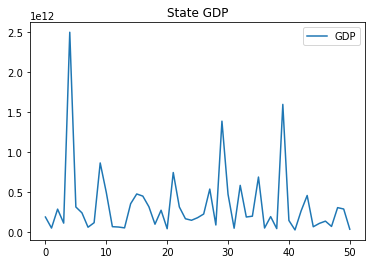

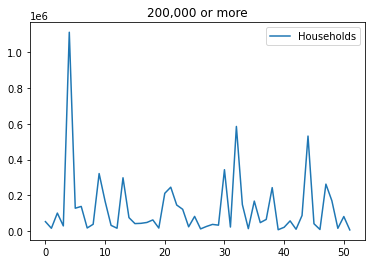

In [391]:
states_median_income.plot(title = '60,000 to 74,999'), states_gdp.plot(title = 'State GDP'), states_highest_income_households.plot(title = '200,000 or more')

In [392]:
states_common = []
households_common= []

for i in range(len(df_income)):
    if df_income.loc[i, 'Income Level'] == '$10,000 to $14,999' and df_income.loc[i, 'Year'] == 2016:
        states_common.append(df_income.loc[i, 'State']) 
        households_common.append(df_income.loc[i, 'Number of Households'])
print(states_common)
print(households_common)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
[126347, 8418, 125264, 82519, 629347, 80302, 50565, 12613, 12205, 398394, 198287, 15336, 31467, 212171, 128274, 60809, 54383, 114927, 116057, 32820, 69385, 126832, 204099, 89868, 84096, 133190, 24715, 36213, 46697, 19590, 119850, 49598, 373344, 232150, 13946, 249837, 86545, 78916, 252508, 145159, 22718, 113279, 17474, 153299, 457750, 32

In [393]:
states_common_income = pd.DataFrame({"State": states_common,
                                                 "Households": households_common})

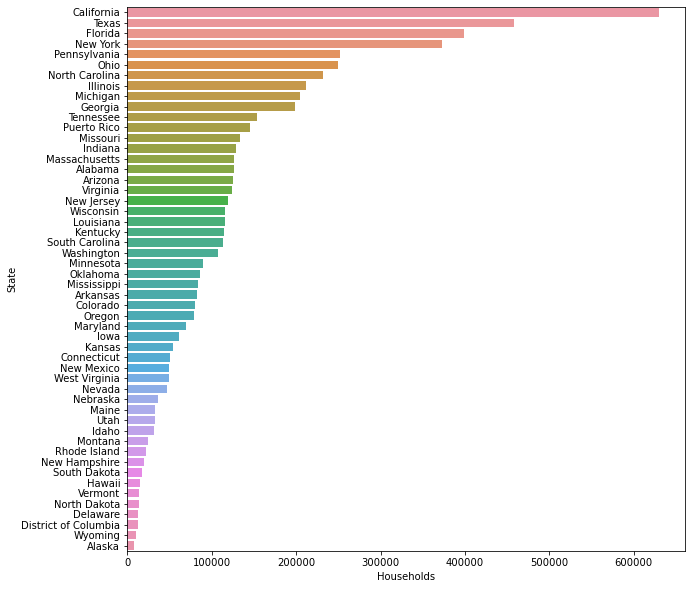

In [394]:
plt.figure(figsize = (10, 10))
sns.barplot(x = 'Households', y = 'State', data = states_common_income , orient = 'h', order = states_common_income .sort_values('Households', ascending = False).State )
plt.show()

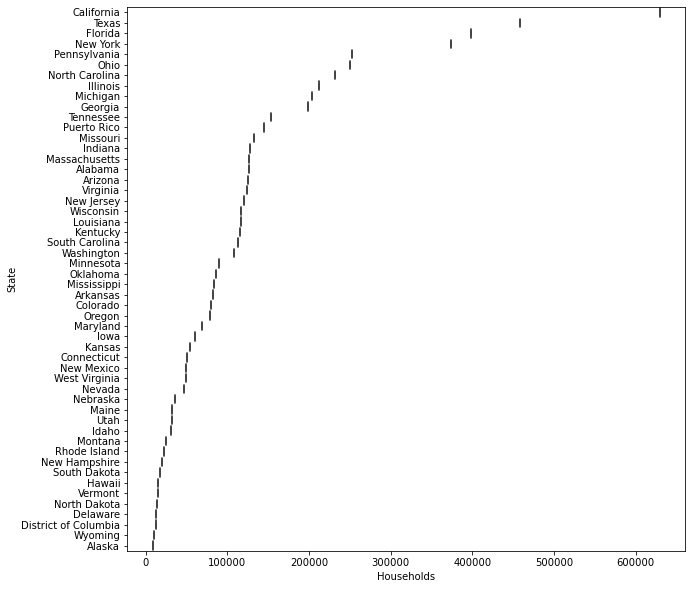

In [395]:
plt.figure(figsize = (10, 10))
sns.boxplot(x = 'Households', y = 'State', data = states_common_income , orient = 'h', order = states_common_income .sort_values('Households', ascending = False).State )
plt.show()

(<AxesSubplot:title={'center':'State GDP'}>,
 <AxesSubplot:title={'center':'60,000 to 74,999'}>,
 <AxesSubplot:title={'center':'200,000 or more'}>,
 <AxesSubplot:title={'center':'$10,000 to $14,999'}>)

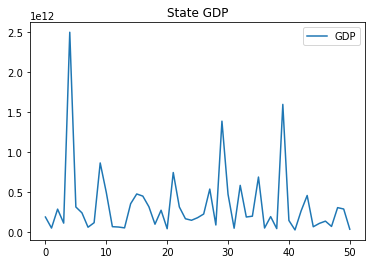

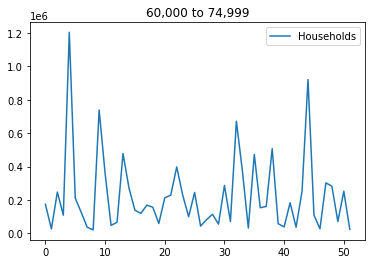

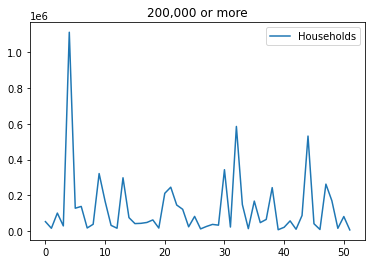

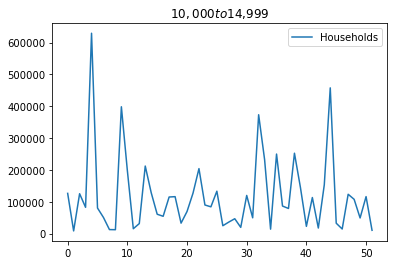

In [396]:
 states_gdp.plot(title = 'State GDP'), states_median_income.plot(title = '60,000 to 74,999'), states_highest_income_households.plot(title = '200,000 or more'), states_common_income.plot(title = '$10,000 to $14,999')

In [397]:
states_box = []
households_box= []
box_dict = {}
for i in range(len(df_income)):
    if df_income.loc[i, 'Year'] == 2016 and df_income.loc[i, 'State'] not in box_dict :
        box_dict[df_income.loc[i, 'State']] = [df_income.loc[i, 'Income Level'], df_income.loc[i, 'Number of Households']]
    if df_income.loc[i, 'Year'] == 2016 and df_income.loc[i, 'State'] in box_dict :
        temp = box_dict[df_income.loc[i, 'State']]
        temp_2 = [df_income.loc[i, 'Income Level'], df_income.loc[i, 'Number of Households']]
        temp_3 = temp + temp_2
        box_dict[df_income.loc[i, 'State']] = temp_3
print(box_dict)


{'Alabama': ['$10,000 to $14,999', 126347, '$10,000 to $14,999', 126347, '$15,000 to $19,999', 118846, '$20,000 to $24,999', 114040, '$25,000 to $29,999', 105954, '$30,000 to $34,999', 101692, '$35,000 to $39,999', 93118, '$40,000 to $44,999', 90043, '$45,000 to $49,999', 75980, '$50,000 to $59,999', 148141, '$60,000 to $74,999', 174333, '$75,000 to $99,999', 204249, '$100,000 to $124,999', 127870, '$125,000 to $149,999', 70558, '$150,000 to $199,999', 66462, '$200,000 or more', 54083, 'Less than $10,000', 179345], 'Alaska': ['$10,000 to $14,999', 8418, '$10,000 to $14,999', 8418, '$15,000 to $19,999', 8345, '$20,000 to $24,999', 9349, '$25,000 to $29,999', 8311, '$30,000 to $34,999', 9295, '$35,000 to $39,999', 9504, '$40,000 to $44,999', 10355, '$45,000 to $49,999', 8585, '$50,000 to $59,999', 17878, '$60,000 to $74,999', 26891, '$75,000 to $99,999', 36934, '$100,000 to $124,999', 28526, '$125,000 to $149,999', 19613, '$150,000 to $199,999', 22037, '$200,000 or more', 16978, 'Less th

In [398]:
sample = pd.DataFrame(box_dict)

In [399]:
sample

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999",...,"$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999"
1,126347,8418,125264,82519,629347,80302,50565,12613,12205,398394,...,17474,153299,457750,32629,14475,123543,107677,49119,116179,10336
2,"$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999",...,"$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999","$10,000 to $14,999"
3,126347,8418,125264,82519,629347,80302,50565,12613,12205,398394,...,17474,153299,457750,32629,14475,123543,107677,49119,116179,10336
4,"$15,000 to $19,999","$15,000 to $19,999","$15,000 to $19,999","$15,000 to $19,999","$15,000 to $19,999","$15,000 to $19,999","$15,000 to $19,999","$15,000 to $19,999","$15,000 to $19,999","$15,000 to $19,999",...,"$15,000 to $19,999","$15,000 to $19,999","$15,000 to $19,999","$15,000 to $19,999","$15,000 to $19,999","$15,000 to $19,999","$15,000 to $19,999","$15,000 to $19,999","$15,000 to $19,999","$15,000 to $19,999"
5,118846,8345,127003,76391,570021,82773,54190,14548,10112,423592,...,16150,153206,469854,34113,13169,123678,109008,50842,117407,10637
6,"$20,000 to $24,999","$20,000 to $24,999","$20,000 to $24,999","$20,000 to $24,999","$20,000 to $24,999","$20,000 to $24,999","$20,000 to $24,999","$20,000 to $24,999","$20,000 to $24,999","$20,000 to $24,999",...,"$20,000 to $24,999","$20,000 to $24,999","$20,000 to $24,999","$20,000 to $24,999","$20,000 to $24,999","$20,000 to $24,999","$20,000 to $24,999","$20,000 to $24,999","$20,000 to $24,999","$20,000 to $24,999"
7,114040,9349,135185,77626,595028,93281,55194,16118,9641,445928,...,17677,156422,490569,40398,12831,126899,118105,51021,122618,11410
8,"$25,000 to $29,999","$25,000 to $29,999","$25,000 to $29,999","$25,000 to $29,999","$25,000 to $29,999","$25,000 to $29,999","$25,000 to $29,999","$25,000 to $29,999","$25,000 to $29,999","$25,000 to $29,999",...,"$25,000 to $29,999","$25,000 to $29,999","$25,000 to $29,999","$25,000 to $29,999","$25,000 to $29,999","$25,000 to $29,999","$25,000 to $29,999","$25,000 to $29,999","$25,000 to $29,999","$25,000 to $29,999"
9,105954,8311,133260,69990,549453,90734,50989,15936,9405,421568,...,18183,146559,469817,39715,12054,126573,111654,44974,116454,10974


In [400]:
state_list = []
for x in box_dict.keys():
    state_list.append(x)


In [402]:
df_income

,Year,State,Income Level,Percent of Total,Number of Households
0,2009,Alabama,"$10,000 to $14,999",0.0742,134988
1,2009,Alabama,"$15,000 to $19,999",0.0687,125046
2,2009,Alabama,"$20,000 to $24,999",0.0661,120178
3,2009,Alabama,"$25,000 to $29,999",0.0607,110437
4,2009,Alabama,"$30,000 to $34,999",0.0578,105216
...,...,...,...,...,...
6651,2016,Wyoming,"$100,000 to $124,999",0.1022,23197
6652,2016,Wyoming,"$125,000 to $149,999",0.0584,13254
6653,2016,Wyoming,"$150,000 to $199,999",0.0499,11330
6654,2016,Wyoming,"$200,000 or more",0.0345,7831


In [405]:
newdf = df_income[df_income.Year == 2016]

In [406]:
newdf

,Year,State,Income Level,Percent of Total,Number of Households
5824,2016,Alabama,"$10,000 to $14,999",0.0683,126347
5825,2016,Alabama,"$15,000 to $19,999",0.0642,118846
5826,2016,Alabama,"$20,000 to $24,999",0.0616,114040
5827,2016,Alabama,"$25,000 to $29,999",0.0572,105954
5828,2016,Alabama,"$30,000 to $34,999",0.0549,101692
...,...,...,...,...,...
6651,2016,Wyoming,"$100,000 to $124,999",0.1022,23197
6652,2016,Wyoming,"$125,000 to $149,999",0.0584,13254
6653,2016,Wyoming,"$150,000 to $199,999",0.0499,11330
6654,2016,Wyoming,"$200,000 or more",0.0345,7831


In [407]:
newdf2 = newdf[['State', 'Income Level', 'Number of Households']]

In [408]:
newdf2

,State,Income Level,Number of Households
5824,Alabama,"$10,000 to $14,999",126347
5825,Alabama,"$15,000 to $19,999",118846
5826,Alabama,"$20,000 to $24,999",114040
5827,Alabama,"$25,000 to $29,999",105954
5828,Alabama,"$30,000 to $34,999",101692
...,...,...,...
6651,Wyoming,"$100,000 to $124,999",23197
6652,Wyoming,"$125,000 to $149,999",13254
6653,Wyoming,"$150,000 to $199,999",11330
6654,Wyoming,"$200,000 or more",7831


In [409]:
group_s = newdf2.groupby(['State'])

The bottom series of graphs shows each state's income levels. As you can see most of the states follow a very similar pattern. 

/Users/vanessalange/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


State
Alabama                 AxesSubplot(0.125,0.125;0.775x0.755)
Alaska                  AxesSubplot(0.125,0.125;0.775x0.755)
Arizona                 AxesSubplot(0.125,0.125;0.775x0.755)
Arkansas                AxesSubplot(0.125,0.125;0.775x0.755)
California              AxesSubplot(0.125,0.125;0.775x0.755)
Colorado                AxesSubplot(0.125,0.125;0.775x0.755)
Connecticut             AxesSubplot(0.125,0.125;0.775x0.755)
Delaware                AxesSubplot(0.125,0.125;0.775x0.755)
District of Columbia    AxesSubplot(0.125,0.125;0.775x0.755)
Florida                 AxesSubplot(0.125,0.125;0.775x0.755)
Georgia                 AxesSubplot(0.125,0.125;0.775x0.755)
Hawaii                  AxesSubplot(0.125,0.125;0.775x0.755)
Idaho                   AxesSubplot(0.125,0.125;0.775x0.755)
Illinois                AxesSubplot(0.125,0.125;0.775x0.755)
Indiana                 AxesSubplot(0.125,0.125;0.775x0.755)
Iowa                    AxesSubplot(0.125,0.125;0.775x0.755)
Kansas            

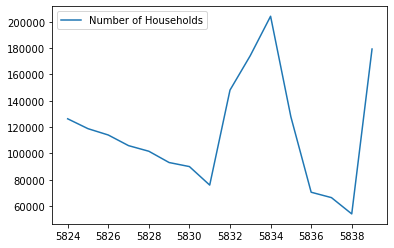

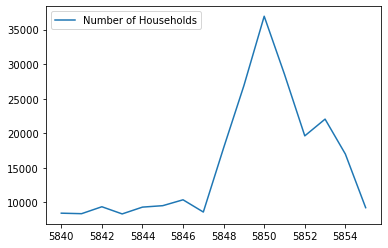

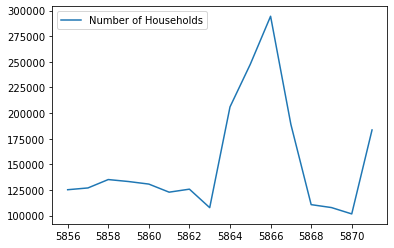

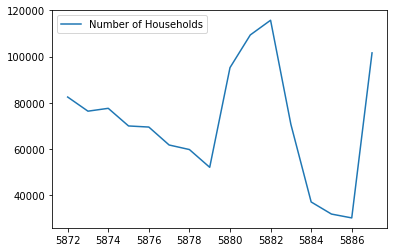

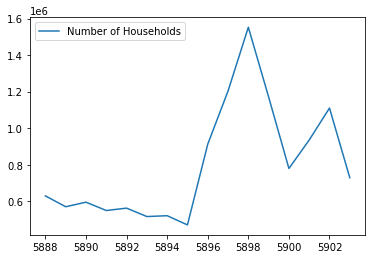

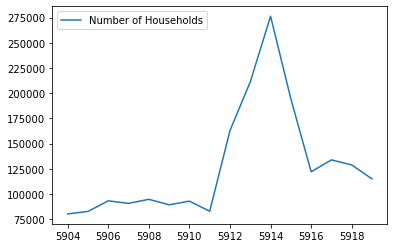

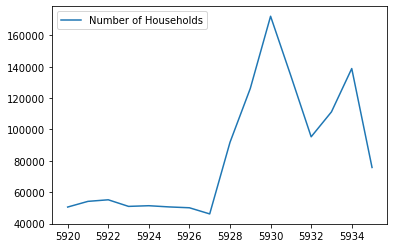

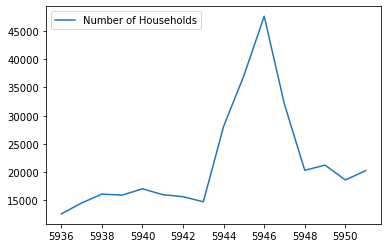

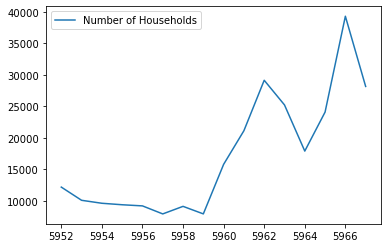

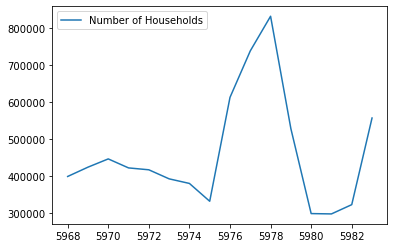

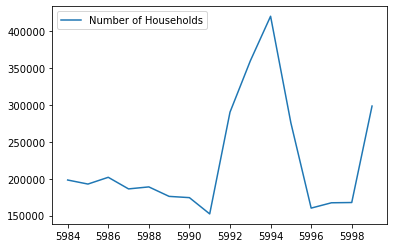

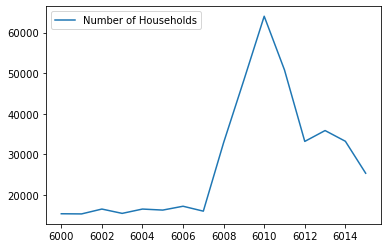

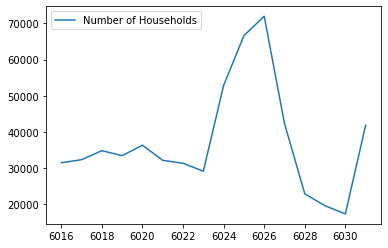

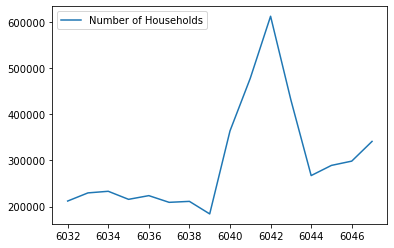

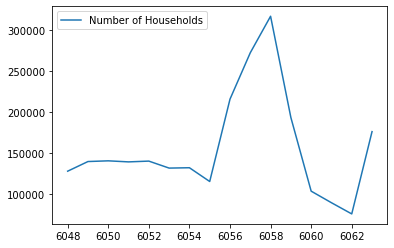

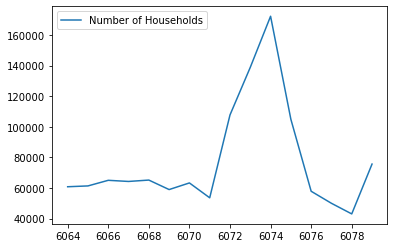

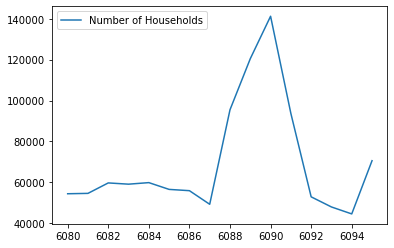

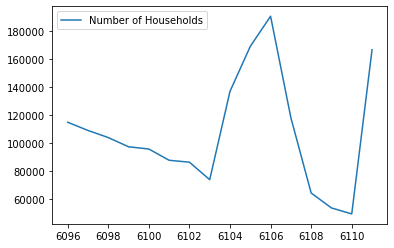

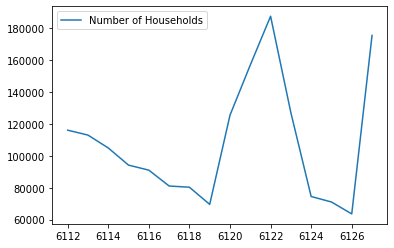

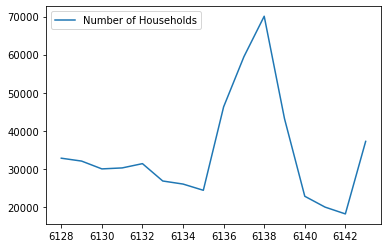

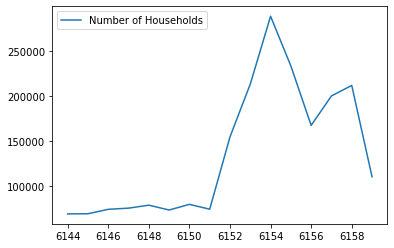

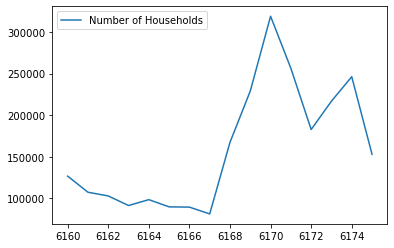

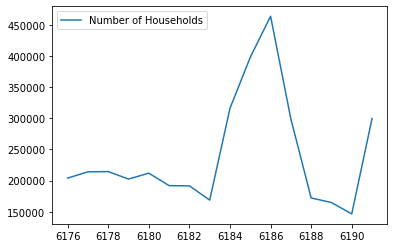

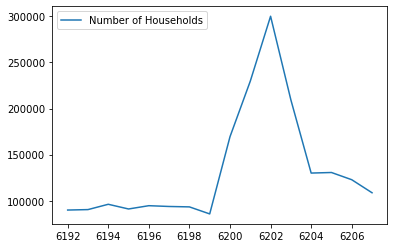

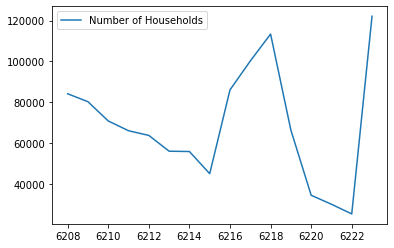

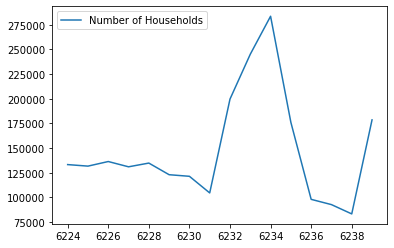

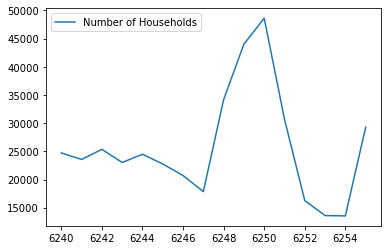

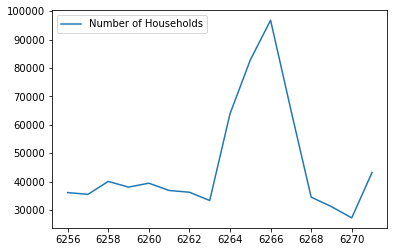

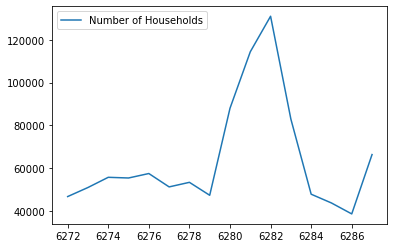

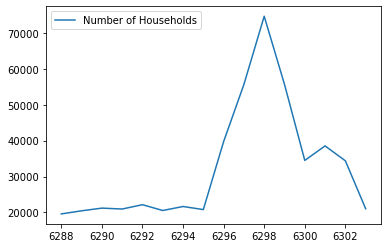

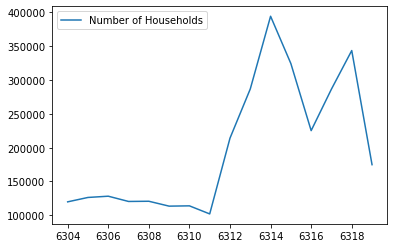

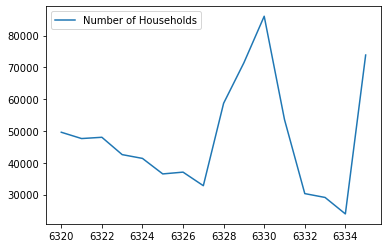

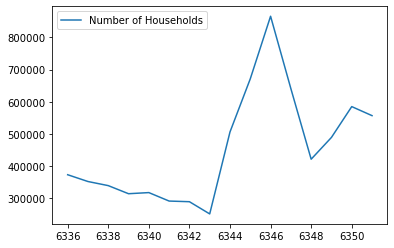

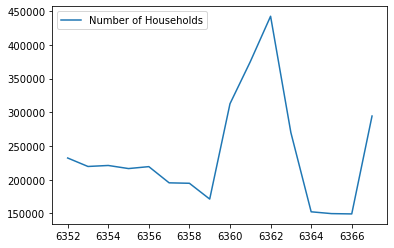

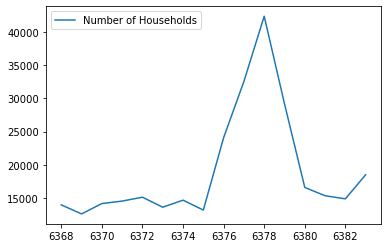

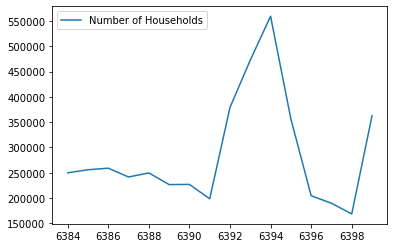

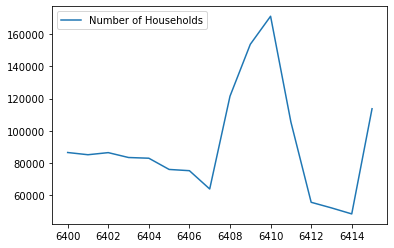

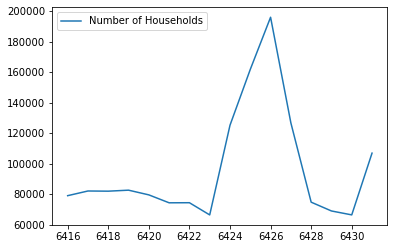

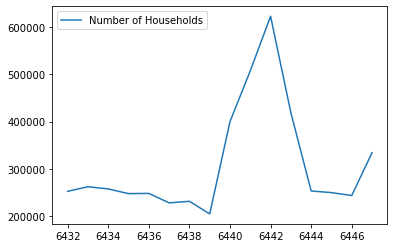

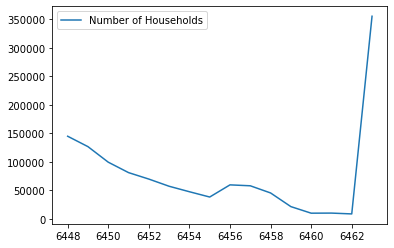

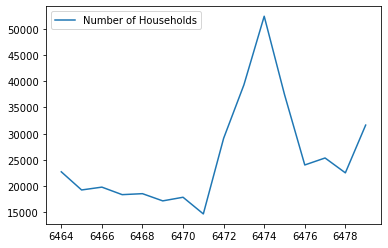

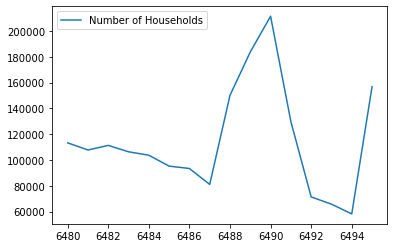

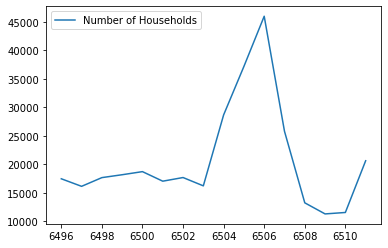

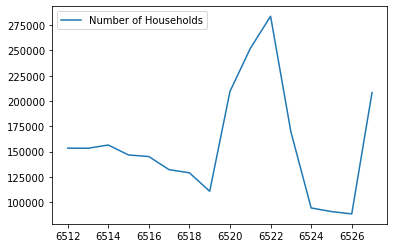

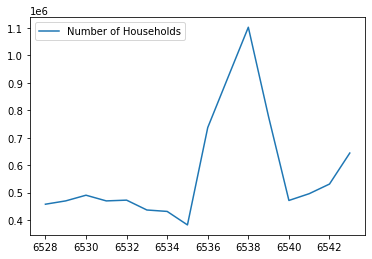

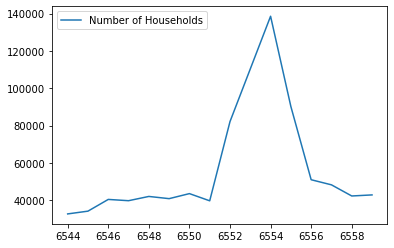

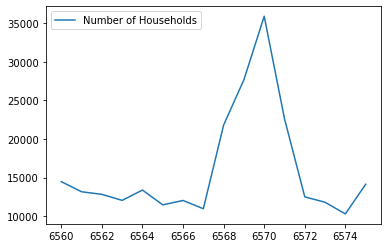

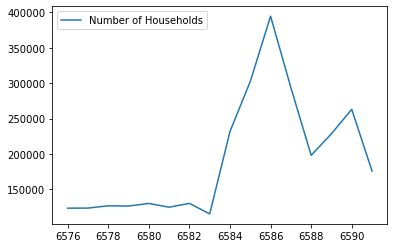

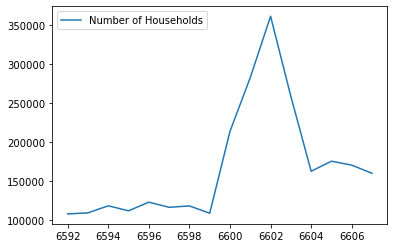

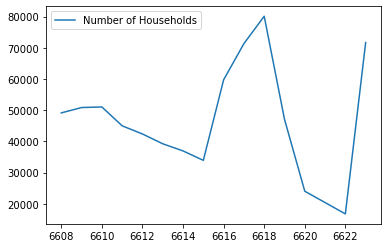

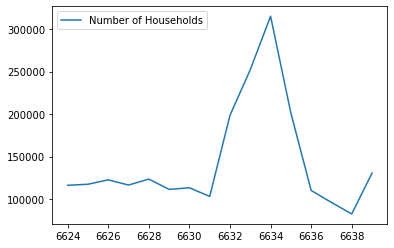

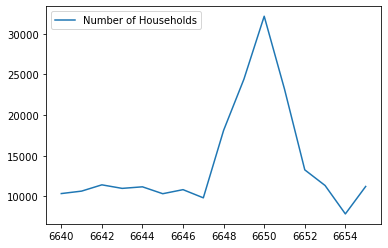

In [410]:
group_s.plot( )

<AxesSubplot:xlabel='State', ylabel='Number of Households'>

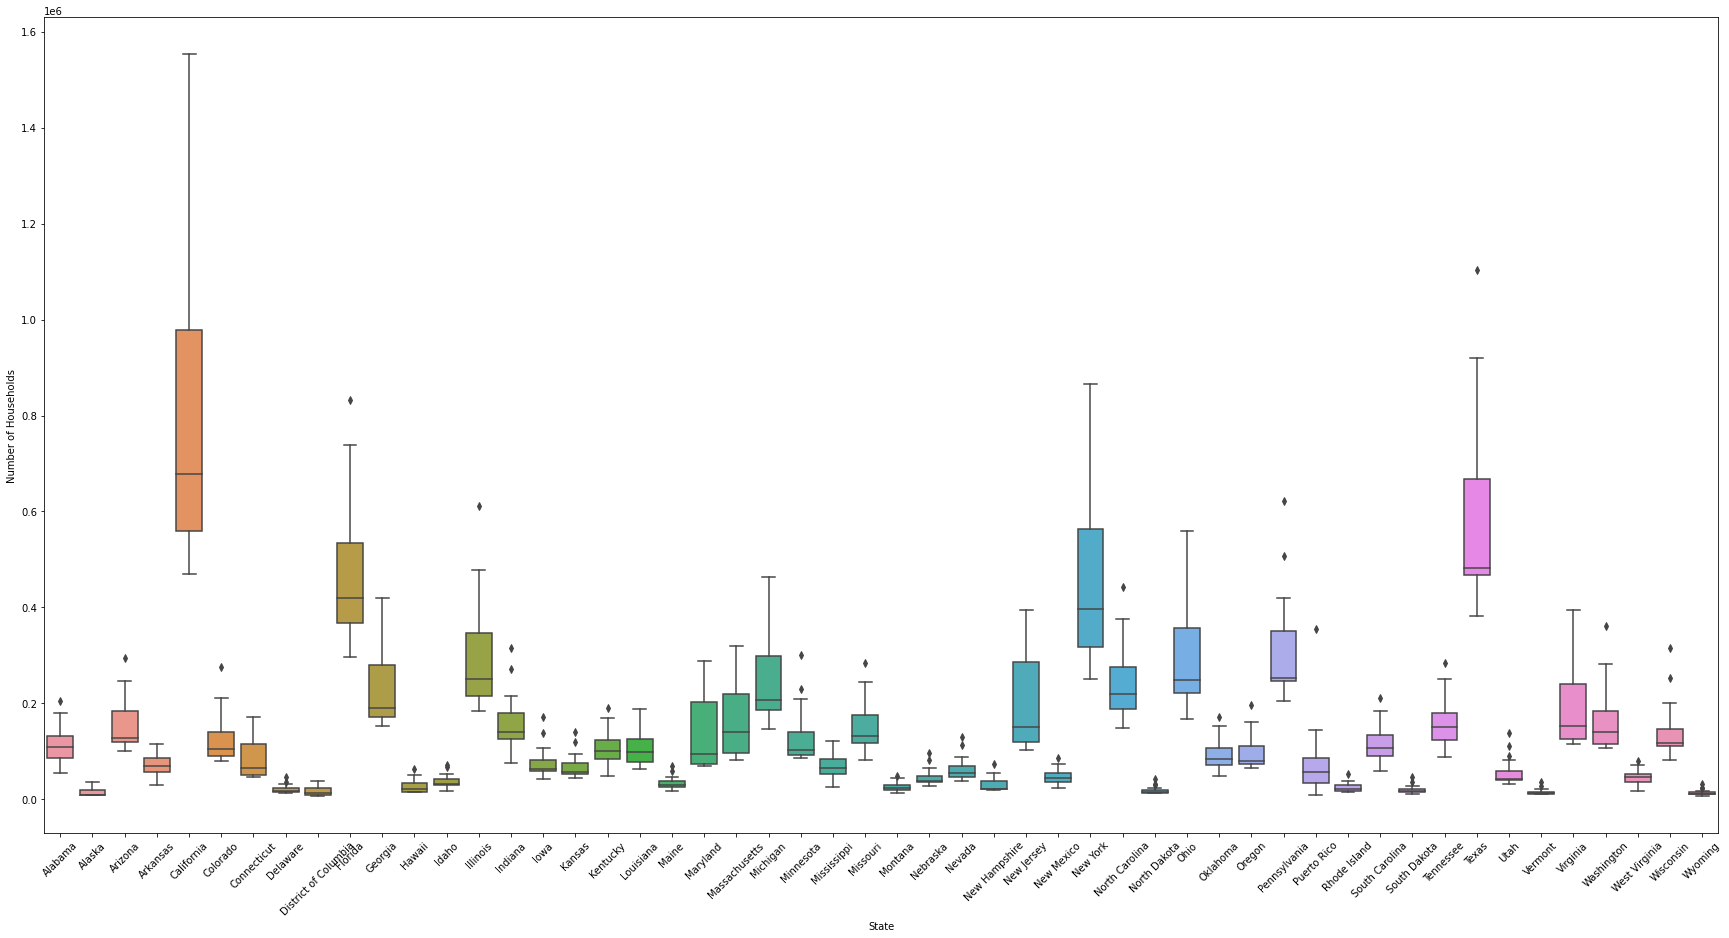

In [411]:
plt.figure(figsize = (30, 15))
plt.xticks(rotation=45)
sns.boxplot(x = 'State', y= "Number of Households", data =newdf2) 

The above graph, shows each states income levels. 

Based on the information from the graphs, states that have bigger populations seem to have more households at higher incomes levels and also higher state gdps. 

Things missing from the data set would be state tax rates, cost of living, and things such as housing prices. 

Based on this data alone, moving to California or New York would seem like a great option, but those are expensive states it live in. Adding in cost of living data could possibly lower their ranking. 